In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load datasets
excel_file_path = "Cancer-Atlas-3rd-ed_Map-data-download.xlsx"
csv_file_path = "scin_cases.csv"


In [4]:
# Load Excel sheet
excel_data = pd.read_excel(excel_file_path, sheet_name='Sheet1')
cancer_atlas_df = excel_data


In [5]:
# Load SCIN CSV
scin_cases_df = pd.read_csv(csv_file_path)

In [6]:
# ========================
# Step 1: Clean Cancer Atlas Data
# ========================
melanoma_df = cancer_atlas_df.iloc[1:, [0, 1, 8]].copy()
melanoma_df.columns = ['Country', 'ISO3', 'Melanoma_Incidence']
melanoma_df['Melanoma_Incidence'] = pd.to_numeric(melanoma_df['Melanoma_Incidence'], errors='coerce')


In [7]:
# Filter melanoma incidence for the USA
melanoma_us = melanoma_df[melanoma_df['Country'].str.contains("United States", na=False, case=False)]


In [8]:
# ========================
# Step 2: Clean and Prepare SCIN Dataset
# ========================
scin_cases_df['related_category'] = scin_cases_df['related_category'].fillna('UNKNOWN')
scin_cases_df['fitzpatrick_skin_type'] = scin_cases_df['fitzpatrick_skin_type'].fillna('UNKNOWN')
scin_cases_df['combined_race'] = scin_cases_df['combined_race'].fillna('UNKNOWN')


In [9]:
# ========================
# Step 3: Grouping and Analysis
# ========================

# Group 1: Frequency of conditions by Fitzpatrick skin type
skin_condition_by_type = scin_cases_df.groupby(['fitzpatrick_skin_type', 'related_category']).size().unstack(fill_value=0)

# Group 2: Frequency of conditions by race
condition_by_race = scin_cases_df.groupby(['combined_race', 'related_category']).size().unstack(fill_value=0)

# Group 3: Overall distribution of reported conditions
condition_totals = scin_cases_df['related_category'].value_counts()


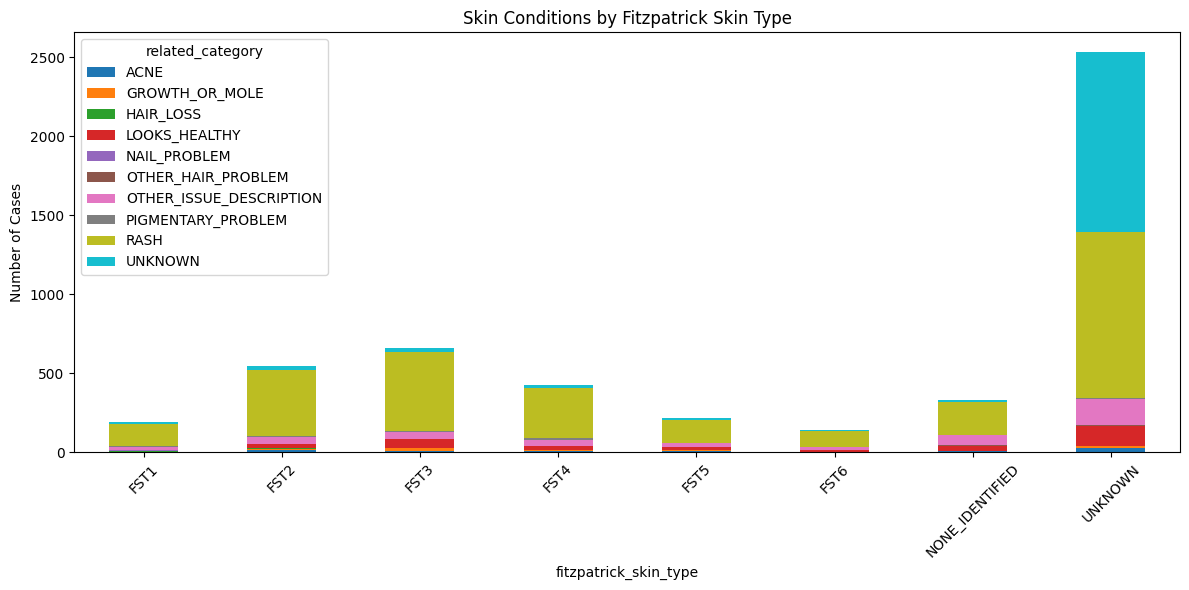

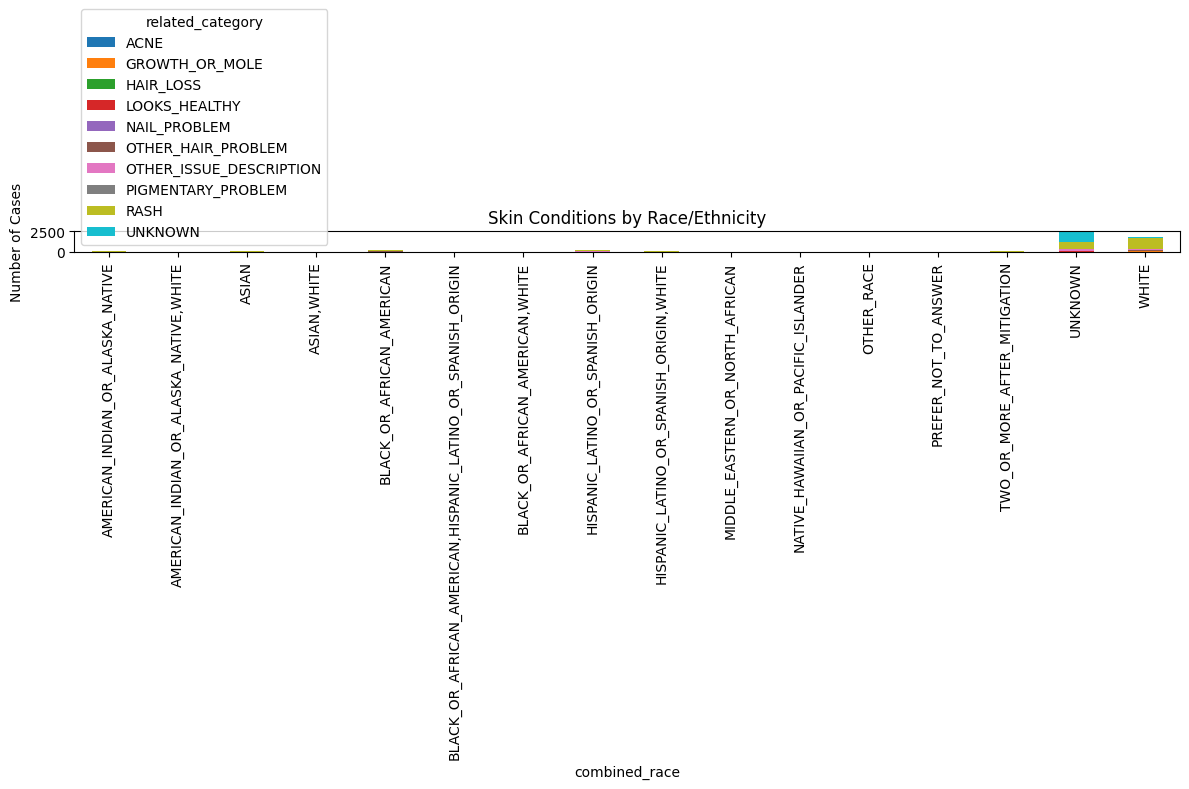

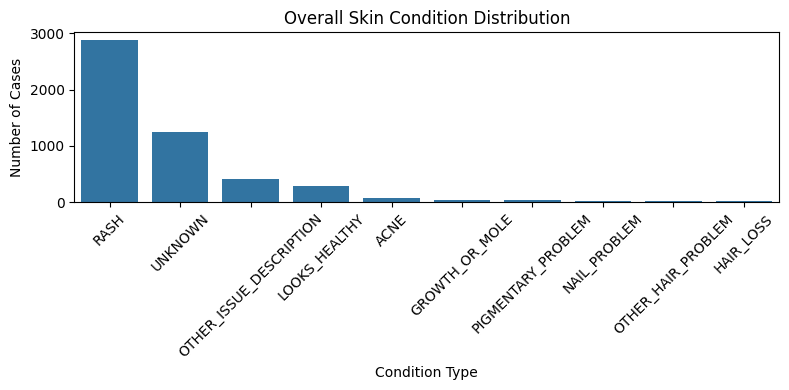

In [10]:
# ========================
# Step 4: Visualization
# ========================

# Plot 1: Skin Conditions by Fitzpatrick Skin Type
fig1, ax1 = plt.subplots(figsize=(12, 6))
skin_condition_by_type.plot(kind='bar', stacked=True, ax=ax1)
ax1.set_title('Skin Conditions by Fitzpatrick Skin Type')
ax1.set_ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 2: Skin Conditions by Race/Ethnicity
fig2, ax2 = plt.subplots(figsize=(12, 6))
condition_by_race.plot(kind='bar', stacked=True, ax=ax2)
ax2.set_title('Skin Conditions by Race/Ethnicity')
ax2.set_ylabel('Number of Cases')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plot 3: Overall Skin Condition Distribution
fig3, ax3 = plt.subplots(figsize=(8, 4))
sns.barplot(x=condition_totals.index, y=condition_totals.values, ax=ax3)
ax3.set_title('Overall Skin Condition Distribution')
ax3.set_ylabel('Number of Cases')
ax3.set_xlabel('Condition Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [11]:
# ========================
# Step 5: Print Melanoma Incidence for USA
# ========================
melanoma_us


,Country,ISO3,Melanoma_Incidence
139,United States of America,USA,12.7


In [12]:
import plotly.express as px
import pandas as pd

# Example data
df_map = pd.DataFrame({
    "country": ["United States", "India", "Brazil", "South Africa", "Germany"],
    "case_count": [500, 300, 400, 200, 250]
})

# Enhanced Choropleth Map
fig = px.choropleth(
    df_map,
    locations="country",
    locationmode="country names",
    color="case_count",
    hover_name="country",
    color_continuous_scale=px.colors.sequential.OrRd,
    title="📍 Skin Conditions Distribution by Country"
)

# Update layout for better visuals
fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='natural earth',
        lakecolor='rgb(255, 255, 255)',
        landcolor='rgb(240, 240, 240)',
        showland=True
    ),
    title_font=dict(size=20, family='Arial'),
    title_x=0.5,
    margin=dict(l=20, r=20, t=60, b=20)
)

# Add colorbar tweaks
fig.update_coloraxes(colorbar_title="Number of Cases")

fig.show()


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a cross-tabulation
diagnosis_vs_fitz = pd.crosstab(scin_cases_df['Fitzpatrick'], scin_cases_df['Diagnosis'])

# Plot
plt.figure(figsize=(10,6))
diagnosis_vs_fitz.plot(kind='bar', stacked=True)
plt.title('Diagnosis Distribution Across Fitzpatrick Skin Types')
plt.xlabel('Fitzpatrick Skin Type')
plt.ylabel('Count')
plt.legend(title='Diagnosis')
plt.tight_layout()
plt.show()


KeyError: 'Fitzpatrick'